# 目录
## K-means
- 测试算法
- 图像压缩
- sklearn K-mean使用
- sklearn K-mean官网例子

## PCA
- 自己写的PCA测试
- PCA 图像降噪恢复
- Sklean PCA

# K-means Clustering and Principal Component Analysis（PCA） 

In [1]:
import scipy.io as sio
data = sio.loadmat('ex7data2.mat')
print data.keys()

['X', '__version__', '__header__', '__globals__']


In [2]:
# print data
X = data['X']
print X.shape

(300, 2)


In [3]:
import numpy as np
K = 3
initial_centroids = np.array([[3, 3],[6, 2],[8, 5]])

In [4]:
idx = np.argmin(initial_centroids,axis=0)
print idx

[0 1]


In [5]:
from findClosestCentroids import findClosestCentroids

In [6]:
idx = findClosestCentroids(X, initial_centroids)
print idx[0:3]

[[ 0.]
 [ 2.]
 [ 1.]]


In [7]:
from computeCentroids import computeCentroids

In [8]:
centroids = computeCentroids(X, idx, K)
print centroids

[[ 2.42830111  3.15792418]
 [ 5.81350331  2.63365645]
 [ 7.11938687  3.6166844 ]]


In [9]:
from runkMeans import runkMeans

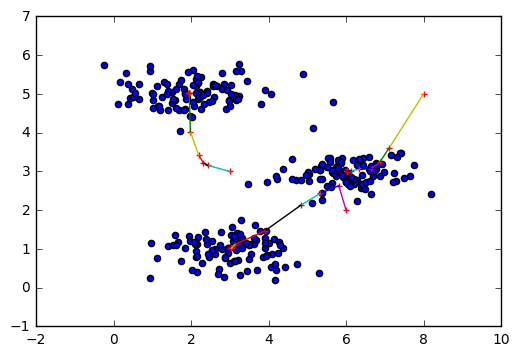

In [10]:
K = 3
max_iters = 10
initial_centroids = np.array([[3, 3],[6, 2],[8, 5]])
centroids, idx = runkMeans(X, initial_centroids, max_iters, 1)

## 图像压缩

In [38]:
import matplotlib.image as mpimg
A = mpimg.imread('bird_small.png')
print type(A)
print A.shape
print A[0][0]
AA = A*255
print AA[0][0]
# imread读取的图片已经除以255了

<type 'numpy.ndarray'>
(128, 128, 3)
[ 0.85882354  0.70588237  0.40392157]
[ 219.  180.  103.]


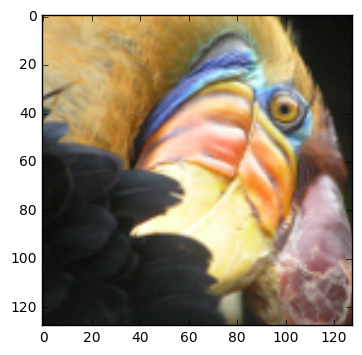

In [39]:
import matplotlib.pyplot as plt
plt.imshow(A)
plt.show()

In [40]:
img_size = np.shape(A)
img_size

(128, 128, 3)

In [41]:
X = np.reshape(A, [img_size[0]*img_size[1], 3])
X.shape

(16384, 3)

In [55]:
K = 16
max_iters = 10
# 随机初始化
import random
randidx = random.sample(range(np.size(X, axis=0)), K) # 从0-16384中取K个数
initial_centroids = X[randidx, :]
initial_centroids

array([[ 0.98823529,  0.93725491,  0.67450982],
       [ 0.07450981,  0.09803922,  0.10588235],
       [ 0.72941178,  0.54509807,  0.24313726],
       [ 0.27843139,  0.3137255 ,  0.33333334],
       [ 0.13333334,  0.14509805,  0.15294118],
       [ 0.64313728,  0.49019608,  0.21568628],
       [ 0.67058825,  0.6156863 ,  0.40000001],
       [ 0.07058824,  0.06666667,  0.05490196],
       [ 0.1882353 ,  0.18039216,  0.18431373],
       [ 0.68627453,  0.58039218,  0.39607844],
       [ 0.48235294,  0.30980393,  0.24313726],
       [ 0.69803923,  0.47058824,  0.49411765],
       [ 0.48235294,  0.73333335,  0.93725491],
       [ 0.13725491,  0.16862746,  0.09803922],
       [ 0.12156863,  0.14117648,  0.12941177],
       [ 0.99215686,  0.86274511,  0.77254903]], dtype=float32)

In [56]:
centroids, idx = runkMeans(X, initial_centroids, max_iters, 0)

In [57]:
print centroids.shape # 最后的16个中心点
print idx[0:5, :]
print centroids

(16, 3)
[[ 6.]
 [ 6.]
 [ 6.]
 [ 6.]
 [ 6.]]
[[ 0.91490817  0.8070671   0.66271299]
 [ 0.09421005  0.10208243  0.09165533]
 [ 0.90828907  0.58915871  0.27029899]
 [ 0.39055306  0.41764158  0.504893  ]
 [ 0.1941998   0.19347595  0.19105522]
 [ 0.65184605  0.47280571  0.21566385]
 [ 0.85127133  0.71312058  0.47408715]
 [ 0.06699796  0.07265369  0.06240121]
 [ 0.29416978  0.28271189  0.29162827]
 [ 0.74871695  0.60783887  0.35555589]
 [ 0.4832924   0.36829394  0.2652947 ]
 [ 0.61467552  0.53526795  0.4923529 ]
 [ 0.57854372  0.6815235   0.80320662]
 [ 0.35892355  0.24576721  0.16098388]
 [ 0.13338596  0.14091684  0.13141844]
 [ 0.97199738  0.94093114  0.80677342]]


## 图像压缩

In [71]:
idx = findClosestCentroids(X, centroids)
print idx[0:10, :]

[[ 6.]
 [ 6.]
 [ 6.]
 [ 6.]
 [ 6.]
 [ 6.]
 [ 6.]
 [ 6.]
 [ 6.]
 [ 6.]]


In [73]:
idx = idx.astype(int) # 索引类型要为int才行

array([[6],
       [6],
       [6],
       ..., 
       [4],
       [4],
       [4]])

In [76]:
X_recovered = centroids[idx, :]
X_recovered.shape

(16384, 1, 3)

In [78]:
X_recovered = np.reshape(X_recovered, [img_size[0], img_size[1], 3])

In [80]:
X_recovered.shape

(128, 128, 3)

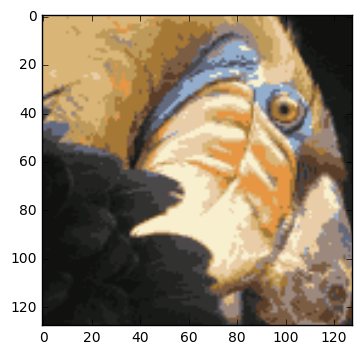

In [81]:
plt.imshow(X_recovered)
plt.show()

# sklearn K-mean算法 

In [82]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.image as mpimg
A = mpimg.imread('bird_small.png')
print A.shape
print A[0][0]

(128, 128, 3)
[ 0.85882354  0.70588237  0.40392157]


In [83]:
img_size = A.shape
X = np.reshape(A, [img_size[0]*img_size[1], 3])
X.shape

(16384, 3)

In [84]:
kmeans = KMeans(n_clusters=16)
kmeans.fit(X)
# 这里迭代300次，算的这么快

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=16, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [85]:
kmeans.cluster_centers_

array([[ 0.58875584,  0.503218  ,  0.45051281],
       [ 0.16610126,  0.16675213,  0.158518  ],
       [ 0.82780868,  0.74676293,  0.73763862],
       [ 0.8699464 ,  0.7182607 ,  0.45653125],
       [ 0.46091208,  0.33090041,  0.18279176],
       [ 0.75917213,  0.6084314 ,  0.34283225],
       [ 0.65107681,  0.47333554,  0.21237376],
       [ 0.38622349,  0.45638896,  0.64606752],
       [ 0.56806725,  0.71938999,  0.86784937],
       [ 0.91806425,  0.57125576,  0.25257406],
       [ 0.28741749,  0.26132625,  0.26047493],
       [ 0.46225491,  0.38989032,  0.35561057],
       [ 0.70300782,  0.63079195,  0.56233107],
       [ 0.96370881,  0.85953798,  0.63189466],
       [ 0.08481743,  0.09187427,  0.08166229],
       [ 0.9770728 ,  0.94622361,  0.81782272]])

In [86]:
kmeans.labels_

array([3, 3, 3, ..., 1, 1, 1], dtype=int32)

In [89]:
X_recovered = kmeans.cluster_centers_[kmeans.labels_, :]
X_recovered = np.reshape(X_recovered, [img_size[0], img_size[1], 3])

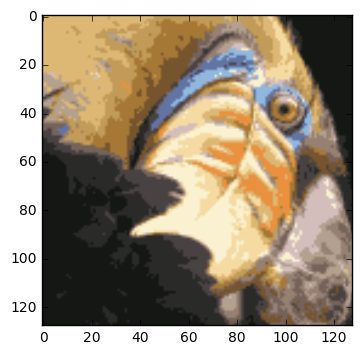

In [90]:
plt.imshow(X_recovered)
plt.show()

使用sklearn 太方便了
  ， 下面测试聚成2类

In [91]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=2, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [92]:
print kmeans.cluster_centers_
print kmeans.labels_

[[ 0.20734981  0.1872529   0.16176778]
 [ 0.7936311   0.68207486  0.51757375]]
[1 1 1 ..., 0 0 0]


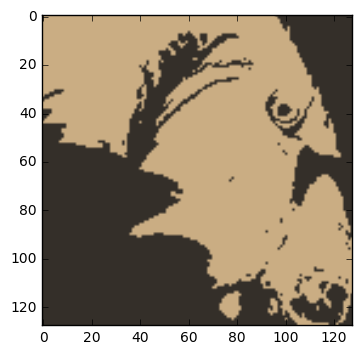

In [93]:
X_recovered = kmeans.cluster_centers_[kmeans.labels_, :]
X_recovered = np.reshape(X_recovered, [img_size[0], img_size[1], 3])
plt.imshow(X_recovered)
plt.show()

## sklearn K-mean 官方例子
执行颐和园（中国）图像的像素矢量量化（VQ），减少显示图像从96,615独特的颜色到64，同时保持整体外观质量所需的颜色数量。

Fitting model on a small sub-sample of the data
done in 0.394s.
Predicting color indices on the full image (k-means)
done in 0.540s.
Predicting color indices on the full image (random)
done in 0.191s.


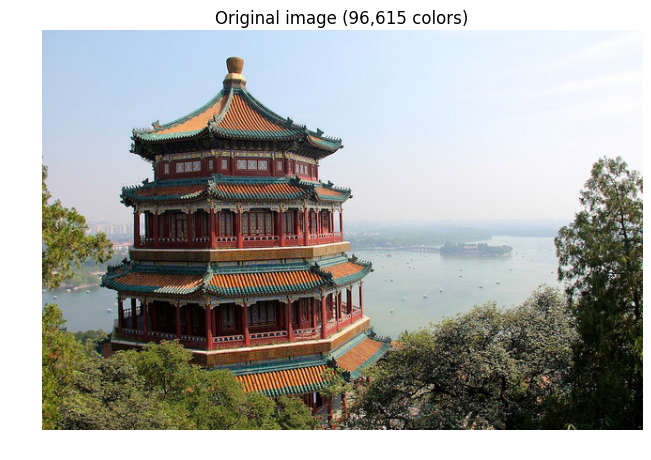

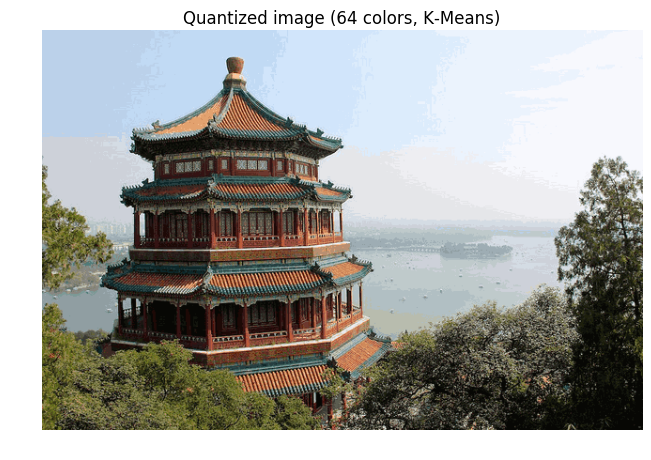

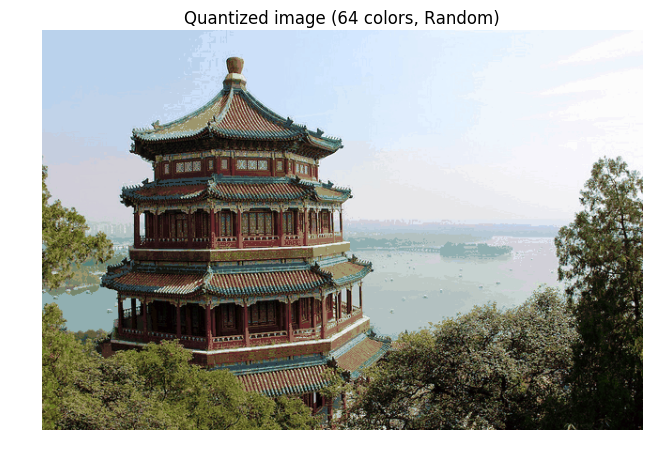

In [94]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle
from time import time

n_colors = 64

# Load the Summer Palace photo
china = load_sample_image("china.jpg")

# Convert to floats instead of the default 8 bits integer coding. Dividing by
# 255 is important so that plt.imshow behaves works well on float data (need to
# be in the range [0-1])
china = np.array(china, dtype=np.float64) / 255

# Load Image and transform to a 2D numpy array.
w, h, d = original_shape = tuple(china.shape)
assert d == 3
image_array = np.reshape(china, (w * h, d))

print("Fitting model on a small sub-sample of the data")
t0 = time()
image_array_sample = shuffle(image_array, random_state=0)[:1000]
kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample)
print("done in %0.3fs." % (time() - t0))

# Get labels for all points
print("Predicting color indices on the full image (k-means)")
t0 = time()
labels = kmeans.predict(image_array)
print("done in %0.3fs." % (time() - t0))


codebook_random = shuffle(image_array, random_state=0)[:n_colors + 1]
print("Predicting color indices on the full image (random)")
t0 = time()
labels_random = pairwise_distances_argmin(codebook_random,
                                          image_array,
                                          axis=0)
print("done in %0.3fs." % (time() - t0))


def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    d = codebook.shape[1]
    image = np.zeros((w, h, d))
    label_idx = 0
    for i in range(w):
        for j in range(h):
            image[i][j] = codebook[labels[label_idx]]
            label_idx += 1
    return image

# Display all results, alongside original image
plt.figure(1)
plt.clf()
ax = plt.axes([0, 0, 1, 1])
plt.axis('off')
plt.title('Original image (96,615 colors)')
plt.imshow(china)

plt.figure(2)
plt.clf()
ax = plt.axes([0, 0, 1, 1])
plt.axis('off')
plt.title('Quantized image (64 colors, K-Means)')
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))

plt.figure(3)
plt.clf()
ax = plt.axes([0, 0, 1, 1])
plt.axis('off')
plt.title('Quantized image (64 colors, Random)')
plt.imshow(recreate_image(codebook_random, labels_random, w, h))
plt.show()

## PCA主成分分析

In [141]:
import scipy.io as sio
data = sio.loadmat('ex7data1.mat')
print data.keys()

['X', '__version__', '__header__', '__globals__']


In [142]:
X = data['X']
print X.shape
m, n = X.shape

(50, 2)


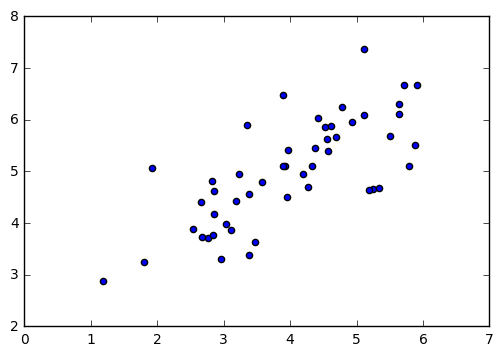

In [143]:
import numpy as np
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1])
plt.show()

(2,)
[ 3.98926528  5.00280585]


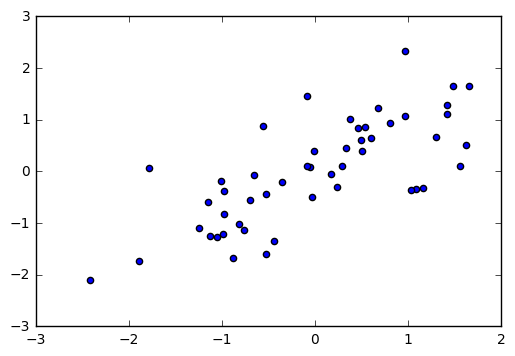

In [144]:
from sklearn.preprocessing import scale
X_norm = scale(X)
mu = np.mean(X, axis=0)
print mu.shape
print mu
plt.scatter(X_norm[:, 0], X_norm[:, 1])
plt.show()

In [155]:
from numpy.linalg import svd
Sigma = 1.0/m * (X_norm.T.dot(X_norm))
print Sigma.shape
print Sigma

(2, 2)
[[ 1.          0.73553038]
 [ 0.73553038  1.        ]]


In [157]:
U, S, V = svd(Sigma)
print U
print S
print V

[[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]
[ 1.73553038  0.26446962]
[[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]


[ 3.98926528  5.00280585]
[ 2.14845733  3.1619979 ]


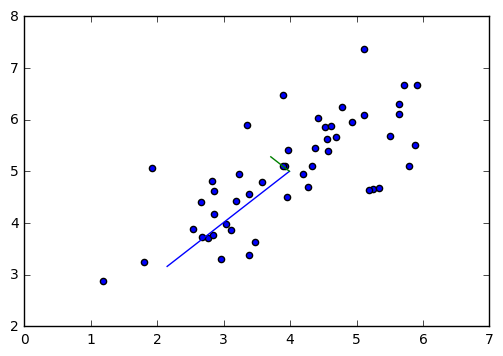

In [163]:
from runkMeans import drawLine
plt.scatter(X[:,0], X[:,1])
print mu
print mu + 1.5 * S[0] * U[:, 0].T
drawLine(mu, mu + 1.5 * S[0] * U[:, 0].T)
drawLine(mu, mu + 1.5 * S[1] * U[:, 1].T)
plt.show()

In [168]:
import numpy as np
def projectData(X, U, K):
    Z = np.zeros((np.size(X, axis=0), K))
    U_reduce = U[:, 0:K]
    Z = X.dot(U_reduce)
    return Z

In [169]:
K = 1
Z = projectData(X_norm, U, K)
print Z[0]

[ 1.49631261]


In [170]:
def recoverData(Z, U, K):
    X_rec = np.zeros((np.size(Z, axis=0), np.size(U, axis=0)))
    U_reduce = U[:, 0:K]
    X_rec = Z.dot(U_reduce.T)
    return X_rec

In [173]:
X_rec = recoverData(Z, U, K)
print X_rec[0, 0], X_rec[0, 1]

-1.05805279222 -1.05805279222


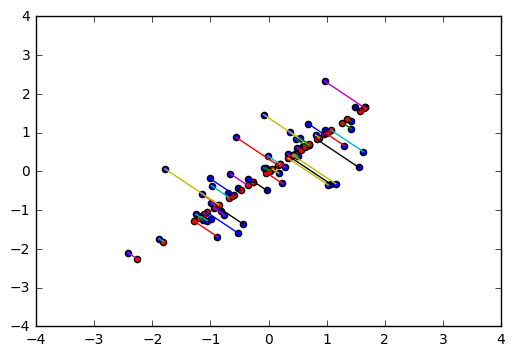

In [178]:
plt.scatter(X_norm[:, 0], X_norm[:, 1])
plt.scatter(X_rec[:, 0], X_rec[:, 1], c='r')
for i in range(np.size(X_norm, axis=0)):
    drawLine(X_norm[i, :], X_rec[i, :])   
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.show()

## PCA 图像去噪

In [179]:
import scipy.io as sio
data = sio.loadmat('ex7faces.mat')
print data.keys()

['X', '__version__', '__header__', '__globals__']


In [183]:
X = data['X']
print X.shape
print X[0]
np.sqrt(1024)

(5000, 1024)
[ -37.86631387  -45.86631387  -53.86631387 ..., -110.86631387 -111.86631387
  -99.86631387]


32.0

In [185]:
face = X.reshape((5000, 32, 32))
face.shape

(5000, 32, 32)

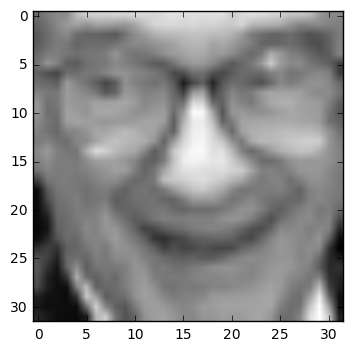

In [195]:
plt.imshow(face[0].T, cmap=plt.get_cmap('gray'))
plt.show()

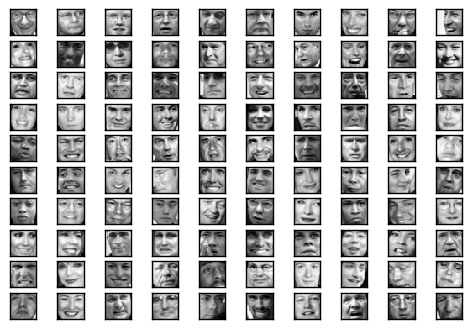

In [199]:
for i in range(100):
    plt.subplot(10, 10, i+1)
    plt.imshow(face[i].T, cmap=plt.get_cmap('gray'), interpolation='nearest')
    plt.xticks(())
    plt.yticks(())
plt.show()

In [202]:
X_norm = scale(X)
mu = np.mean(X, axis=0)
from numpy.linalg import svd
Sigma = 1.0/m * (X_norm.T.dot(X_norm))
U, S, V = svd(Sigma)
print U.shape

(1024, 1024)


In [205]:
Uface = U.T.reshape((1024, 32, 32))

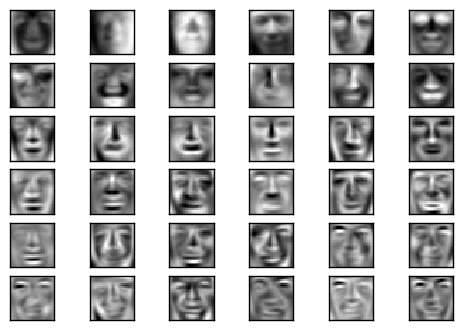

In [207]:
for i in range(36):
    plt.subplot(6, 6, i+1)
    plt.imshow(Uface[i].T, cmap=plt.get_cmap('gray'), interpolation='nearest')
    plt.xticks(())
    plt.yticks(())
plt.show()

In [208]:
K = 100
Z = projectData(X_norm, U, K)
print Z.shape

(5000, 100)


In [209]:
X_rec = recoverData(Z, U, K)

In [210]:
print X_norm.shape
print X_rec.shape

(5000, 1024)
(5000, 1024)


In [211]:
face_X_norm = X_norm.reshape((5000, 32, 32))
face_X_rec = X_rec.reshape((5000, 32, 32))
print face_X_norm.shape
print face_X_norm.shape

(5000, 32, 32)
(5000, 32, 32)


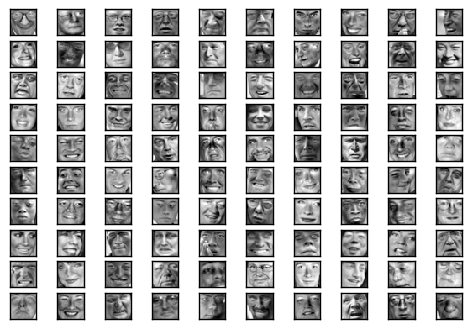

In [212]:
for i in range(100):
    plt.subplot(10, 10, i+1)
    plt.imshow(face_X_norm[i].T, cmap=plt.get_cmap('gray'), interpolation='nearest')
    plt.xticks(())
    plt.yticks(())
plt.show()

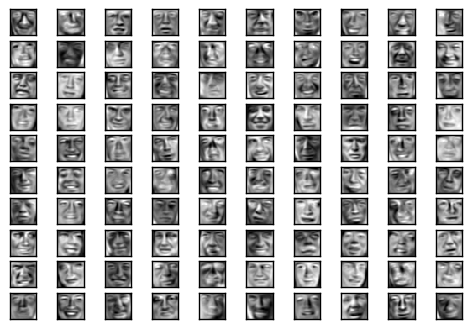

In [213]:
for i in range(100):
    plt.subplot(10, 10, i+1)
    plt.imshow(face_X_rec[i].T, cmap=plt.get_cmap('gray'), interpolation='nearest')
    plt.xticks(())
    plt.yticks(())
plt.show()

原图和去噪声回复后的图
# 下面使用sklearn PCA进行图像的降噪声恢复

In [214]:
import scipy.io as sio
data = sio.loadmat('ex7faces.mat')
print data.keys()

['X', '__version__', '__header__', '__globals__']


In [215]:
X = data['X']
print X.shape
print X[0]

(5000, 1024)
[ -37.86631387  -45.86631387  -53.86631387 ..., -110.86631387 -111.86631387
  -99.86631387]


In [216]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.9) # 保留90%的特征
pca.fit(X)

PCA(copy=True, n_components=0.9, whiten=False)

In [222]:
print pca.components_.shape
print pca.n_components_# 可以看到前68个特征占有了90的特征
eigenfaces = pca.components_.reshape((pca.n_components_, 32, 32)) # 特征脸
print eigenfaces.shape

(68, 1024)
68
(68, 32, 32)


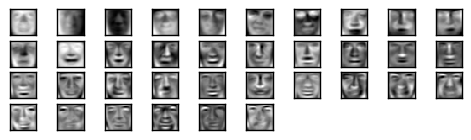

In [225]:
for i in range(36):
    plt.subplot(10, 10, i+1)
    plt.imshow(eigenfaces[i].T, cmap=plt.get_cmap('gray'), interpolation='nearest')
    plt.xticks(())
    plt.yticks(())
plt.show()

In [228]:
pca.explained_variance_.shape

(68,)

In [232]:
U, s, V = svd(X)
print U.shape
print s.shape
print V.shape

(5000, 5000)
(1024,)
(1024, 1024)


In [241]:
S = np.zeros((1024, 1024))
for i in range(1024):
    S[i, i] = s[i]
    
print S

[[  5.06768391e+04   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   4.27148846e+04   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   3.39655173e+04 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 ..., 
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   4.15683500e+01
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    4.03809676e+01   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   3.96849504e+01]]


In [247]:
X_rec = U[:, 0:68].dot(S[0:68, 0:68]).dot(V[0:68, :])
print X_rec.shape

(5000, 1024)


In [248]:
X_rec_face = X_rec.reshape((5000, 32, 32))
print X_rec_face.shape

(5000, 32, 32)


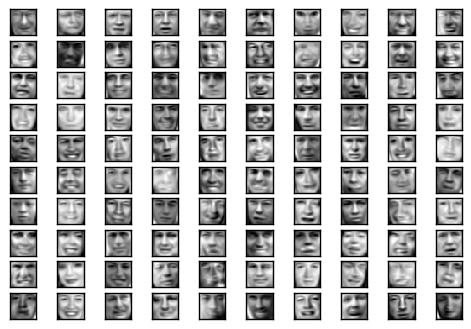

In [249]:
for i in range(100):
    plt.subplot(10, 10, i+1)
    plt.imshow(X_rec_face[i].T, cmap=plt.get_cmap('gray'), interpolation='nearest')
    plt.xticks(())
    plt.yticks(())
plt.show()